In [1]:
from pylab import *
from scipy.integrate import quad
#%matplotlib notebook
from scipy.special import eval_genlaguerre
from scipy import optimize
from matplotlib import colors
import math
from scipy.misc import derivative


In [2]:
#Global Parameters-change at will

lamda=400*pow(10,-9)
w0=5*pow(10,-3)
z0=math.pi*w0**2/lamda

def c_z0(w0,lamb):
    return(math.pi*w0**2/lamb)

def w(z,w0,lamda):
    z_0=c_z0(w0,lamda)
    return(w0*sqrt(1+z**2/z0**2))

def lg_poli(m,l,x):
    return(eval_genlaguerre(m, l, x, out=None))

def amplitude(l,m,A,w0,lamda,p,phi,z):
    w_z=w(z,w0,lamda)
    p_over_z=p/w_z
    
    return A*w0/w_z*pow(p_over_z,l)*lg_poli(m,l,2*p_over_z**2)*exp(-p_over_z**2)


def phase(l,m,w0,lamda,p,phi,z):
    k=2*pi/lamda
    z_0=c_z0(w0,lamda)
    
    r_z=z*(1+z**2/z0**2)**2
    
    return k*z+k*p**2/(2*r_z)+l*phi-(l+2*m+1)*arctan(1+z/z_0)

def u_laguerre(l,m,A,w0,lamda,p,phi,z):
    return amplitude(l,m,A,w0,lamda,p,phi,z)*exp(-phase((l,m,w0,lamda,p,phi,z)*1j))

def G_poli(l,u):
    G=[1,2*u]
    for i in range(2,l+1):
        G.append(2*u*G[i-1]-2*(i-1)*G[i-2])
    return G[l]*exp(-u**2/2)
        
def amplitude_hermite(l,m,A,w0,lamda,x,y,z):
    w_z=w(z,w0,lamda)
    C=(2/(pi*math.factorial(l)*math.factorial(m)))**0.5*pow(2,(-l-m)/2)
    
    return A*C*w0/w_z*G_poli(l,sqrt(2)*x/w_z)*G_poli(m,sqrt(2)*y/w_z)

def phase_hermite(l,m,w0,lamda,x,y,z):
    k=2*pi/lamda
    z_0=c_z0(w0,lamda)
    
    r_z=z*(1+z**2/z0**2)**2
    
    return -k*z-k*(x**2+y**2)/(2*r_z)+(l+m+1)*arctan(z/z_0)+z/pow(3,8)

def u_hermite(l,m,A,w0,lamda,x,y,z):
    A=amplitude_hermite(l,m,A,w0,lamda,x,y,z)*exp(phase_hermite(l,m,w0,lamda,x,y,z)*1j)
    return A



def plot_HG(l,m,A,w0,lamda):
    
    x = np.linspace(-3.5*w0,3.5*w0, 400)
    y = np.linspace(-3.5*w0,3.5*w0, 400)
    X,Y=np.meshgrid(x,y)
    U=abs(u_hermite(l,m,A,w0,lamda,X,Y,1))**2
    eixox = "HG(" + str(int(l)) + "," + str(int(m)) + ")" + "   Coeficiente = " + str(A)
    contours=plt.contour(X/w0, Y/w0, U, 50, cmap=plt.get_cmap('jet'));
    plt.xlabel("X/w0")
    plt.ylabel("Y/w0")
    plt.title(eixox)
    plt.show()
   
def plot_u(u,n,m,A,w0,lamda,x,y,z):
    U=abs(u)**2
    contours=plt.contourf(x/w0, y/w0, U, 220, cmap=plt.get_cmap('jet'))
    plt.xlabel("X/w0")
    plt.ylabel("Y/w0")
    plt.show()
    
def create_LG(n,m,A,w0,lamda,x,y,z):
    k=2*pi/lamda
    n=int(n)
    m=int(m)
    N=int(n+m)
    #N=n+m
    u=0
    for k in range(0,N+1):
        b=math.factorial(N-k)*math.factorial(k)/(pow(2,N)*math.factorial(n)*math.factorial(m))
        b=b**0.5/math.factorial(k)*derivative(lambda t: pow(1-t,n)*pow(1+t,m),0,0.2,n=k,order=2*N+1)

        n_laguerre=N-k
        m_laguerre=k
        
        l=abs(m_laguerre-n_laguerre)
        m_laguerre=min(m_laguerre,n_laguerre)

        b=round(b,5)
        
        u=u+pow(1j,k)*b*u_hermite(N-k,k,A,w0,lamda,x,y,z)

    return u


def torque2(r,n,m,A,w0,lamda,z):
    
    freq=pow(3,8)/lamda
    
    amplitude1=lambda x : amplitude(n,m,A,w0,lamda,x,0.1,1)**2
    cd=quad(lambda x: amplitude1(x)*2*math.pi*x, 0, 8*w0)[0]  
    a= quad(lambda x: amplitude1(x)*2*math.pi*x, 0, r)[0]/cd

    return a/pow(r,3)

def torque(r,n,m,A,w0,lamda,z):
    a = quad(lambda x: torque2(r,n,m,A,w0,lamda,z), 0, r)[0]
    return a

def get_plot(xs,n,m):
    ys = []
    
    for x in xs:
        abc=torque2(x,n,m,1,w0,lamda,1)/(2*math.pi*maxims)*abs(n+1)
        ys.append((abc))
    
    
    ys = np.array(ys) 

    plt.xlabel("R/w0")
    eixox = "LG (" + str(int(n)) + "," + str(int(m)) + ")"
    plt.ylabel('Relative torque')
    plt.plot(xs/w0, ys,label=eixox)
    plt.legend()
    #plt.show()

    

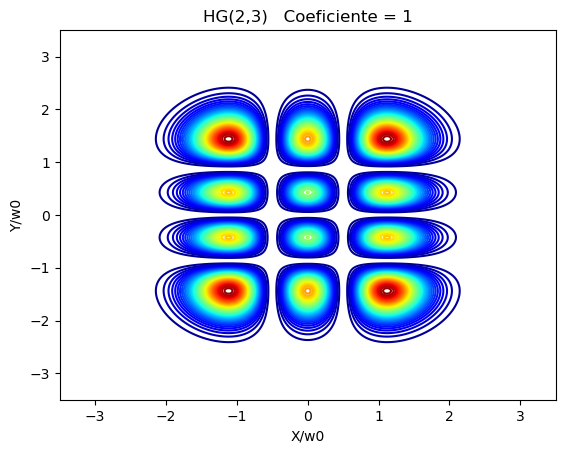

In [3]:
#Plot the Hermitian Gaussian laser
#Change parameters at will
l=2 
m=3
A=1

plot_HG(l,m,A,w0,lamda)

3501.0168684738574


/tmp/ipykernel_94221/48025899.py:113: RuntimeWarning: invalid value encountered in double_scalars
  return a/pow(r,3)


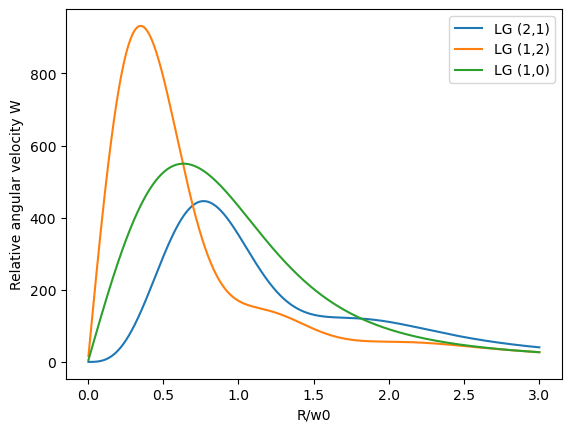

In [4]:
r= np.linspace(0,3*w0, 800)

yr=lambda x: torque(x,1,0,1,w0,lamda,1)
maxims=yr(r[199])/(2*math.pi)
print(maxims)


get_plot(r,2,1)
get_plot(r,1,2)
get_plot(r,1,0)
plt.show()



/tmp/ipykernel_94221/48025899.py:90: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  b=b**0.5/math.factorial(k)*derivative(lambda t: pow(1-t,n)*pow(1+t,m),0,0.2,n=k,order=2*N+1)


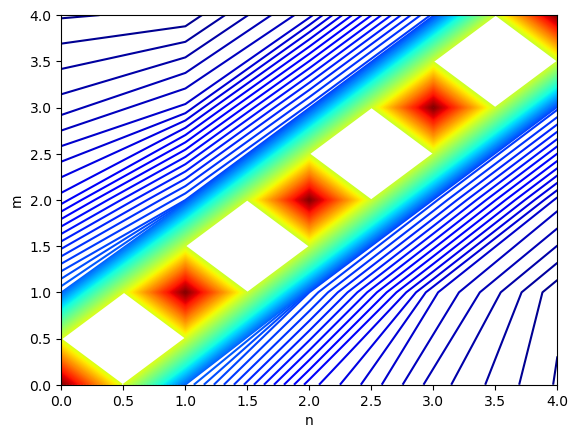

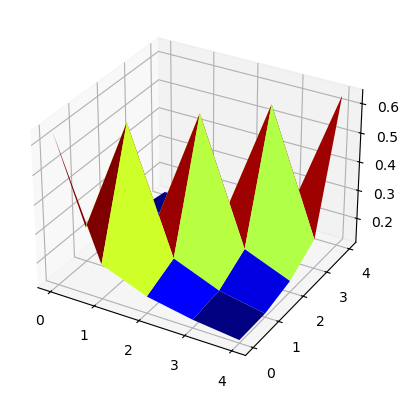

In [5]:
def maxI():
    
    numero=5
    c= np.zeros( (numero, numero) )
    
    n =  np.linspace(0,numero-1,numero)
    m =  np.linspace(0,numero-1,numero)
    
    p = np.linspace(0,w0*3, 500)
    phi = np.linspace(0, 2*np.pi, 5)

    L,M=np.meshgrid(n,m)
    
    x = np.linspace(0,3*w0, 2000)
    y = np.linspace(0,w0/1000, 1)
    
    U=lambda a,b: (abs(create_LG(a,b,1,w0,lamda,x,0,1))**2).max()

    U2=lambda a,b,d: (abs(create_LG(a,b,1,w0,lamda,d,0,1))**2)
    
    maxi=optimize.differential_evolution(lambda b: -U2(b[0],b[1],b[2]*w0),[(0, 9), (0, 9),(0,3)])
    
    ind = lambda a,b :np.argmax(abs(create_LG(a,b,1,w0,lamda,x,0,1))**2)

    for e in range(0,c.shape[0]):
        for i in range (0,c.shape[1]):
            c[i][e]=U(int(e),int(i))
     

    contours=plt.contour(L, M, c, 120,cmap=plt.get_cmap('jet'));
    plt.xlabel("n")
    plt.ylabel("m")
    plt.show()
    
    fig = plt.figure()

    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(L, M, c,cmap=plt.get_cmap('jet'))
    
maxI()

/tmp/ipykernel_94221/48025899.py:90: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  b=b**0.5/math.factorial(k)*derivative(lambda t: pow(1-t,n)*pow(1+t,m),0,0.2,n=k,order=2*N+1)


0.6291167341830639


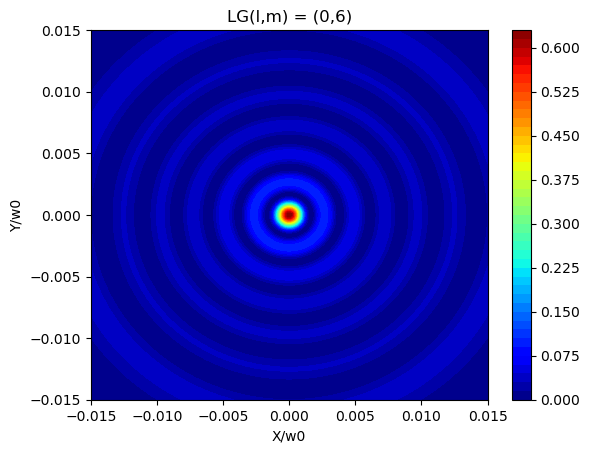

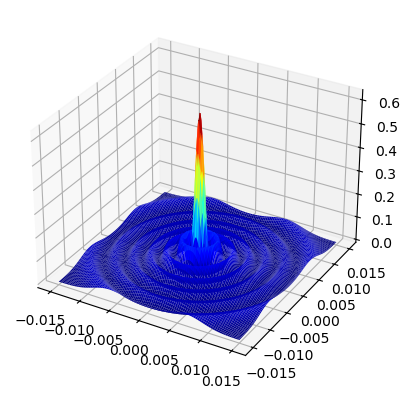

In [6]:
n,m=6,6
w0=5*pow(10,-3)
x = np.linspace(-3*w0,3*w0, 200)
y = np.linspace(-3*w0,3*w0, 200)
X,Y=np.meshgrid(x,y)

U=abs(create_LG(n,m,1,w0,lamda,X,Y,1))**2

m_laguerre=min(m,n)
        
l=abs(m-n)

eixox = "LG(l,m) = (" + str(int(l)) + "," + str(int(m_laguerre)) + ")"
contours=plt.contourf(X, Y, U, 50, cmap=plt.get_cmap('jet'));
print(max(map(max, U)))
plt.xlabel("X/w0")
plt.ylabel("Y/w0")
plt.title(eixox)
plt.colorbar()
plt.show()



fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface.
ax.plot_surface(X, Y, U, rstride=2, cstride=2,cmap=plt.get_cmap('jet'),alpha=1)